In [117]:
import os
import importlib
import pyhxexpress as hxex
import numpy as np, pandas as pd
#import config  
#import hdxms_params_22Dec2023 as config
import test_config as config

def hxex_reload():
    importlib.reload(hxex)
    importlib.reload(config)
    hxex.config = config

hxex_reload()
#help(hxex)

hxex.config.Hide_Figure_Output = False

# hxex.config.Output_DIR = os.path.join(config.Data_DIR,'output_fixedpops_'+str(config.date),'')
# if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)


metadf = hxex.get_metadf()
filtered = metadf[0:1]
#filtered = hxex.filter_metadf(metadf,quiet=False,samples='Bradykinin_Lo',)#index=[*range(0,2)])#,charge=2, samples='B1B5',quiet=False)
#display(metadf)
display(filtered)
#hxex.run_hdx_fits(filtered)
#hxex.run_hdx_fits(metadf)
# userdeut,userraw = hxex.get_data(filtered)
# hxex.run_hdx_fits(filtered,userdeut,userraw)
#hxex.deutdata_all.to_csv(os.path.join(config.Data_DIR,'test_all_deutdata_26jan2024.csv'),index_label='Index')
deut,raw = hxex.get_data(filtered)

Found 17 sample types with 24 total datasets to analyze.


,file,sample,start_seq,end_seq,peptide_range,charge,peptide
0,LeuEnk_1_HI.xlsx,LeuEnk_HI,1,5,0001-0005,1,YGGFL


In [114]:
import keras
import tensorflow
print("keras",keras.__version__)
print("tf",tensorflow.__version__)

keras 2.13.1
tf 2.13.0


In [119]:
raw

,mz,Intensity,time,sample,peptide,charge,rep,peptide_range,file,time_idx
0,555.412,79.75,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,0
1,555.422,46.00,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,0
2,555.432,36.25,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,0
3,555.442,61.25,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,0
4,555.453,83.25,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,0
...,...,...,...,...,...,...,...,...,...,...
20121,564.492,20.25,1260.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,21
20122,564.502,13.75,1260.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,21
20123,564.513,6.75,1260.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,21
20124,564.523,2.25,1260.0,LeuEnk_HI,YGGFL,1,1,0001-0005,LeuEnk_1_HI.xlsx,21


In [116]:
#importlib.reload(hxex)
deut
#from keras.models import load_model
#model = load_model(os.path.join(hxex.config.Data_DIR,'model_1000peps_nonoise_22jan24.keras'))
model = load_model(os.path.join(hxex.config.Data_DIR,'model4_1000peps_4feat_23jan24.keras'))
deut_pred = hxex.predict_pops(model,deut)
deut_pred_reduced = deut_pred.copy()[deut_pred['n_deut']==0].drop(columns=['mz','Intensity','n_deut'])
deut_pred_reduced

model.save(os.path.join(hxex.config.Data_DIR,'model4_1000peps_4feat_23jan24.h5'))

9/9 [==============================] - 0s 877us/step


C:\Users\tuttl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


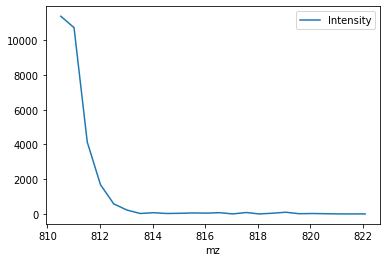

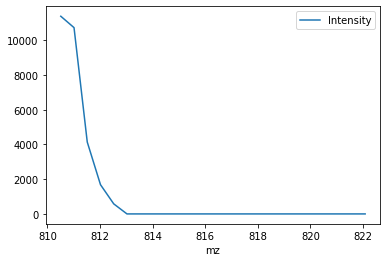

In [75]:
'''
Framework to enable trimming individual datasets according to low/high mz ranges. 
Trim ranges could be stored as columns on a config_df type dataframe

'''
importlib.reload(hxex)
def trim_data(df,spectrum,hi=np.inf,low=-np.inf,coly='Intensity',colx='mz',newvalue=0.0):
    dfc = df.copy()
    trim_idx = spectrum[(spectrum[colx] < low) | (spectrum[colx] > hi)].index
    dfc.loc[trim_idx,coly] = newvalue
    return dfc 

#alldeut = hxex.deutdata_all.copy()

single_spectrum = hxex.filter_metadf(alldeut,samples='pep123_LO',timept=0.0,charge=2,rep=1,range=[0,15])
#hxex.filter_metadf(alldeut,samples='pep123_LO',timept=0.0,charge=2,rep=1,peptide_ranges='0001-0015')
single_spectrum.plot('mz','Intensity')
newdeut = trim_data(alldeut,single_spectrum,hi=813,newvalue=0.0)#.plot('mz','Intensity')
single_trimmed = hxex.filter_metadf(newdeut,samples='pep123_LO',timept=0.0,charge=2,rep=1,range=[1,15])
single_trimmed.plot('mz','Intensity');



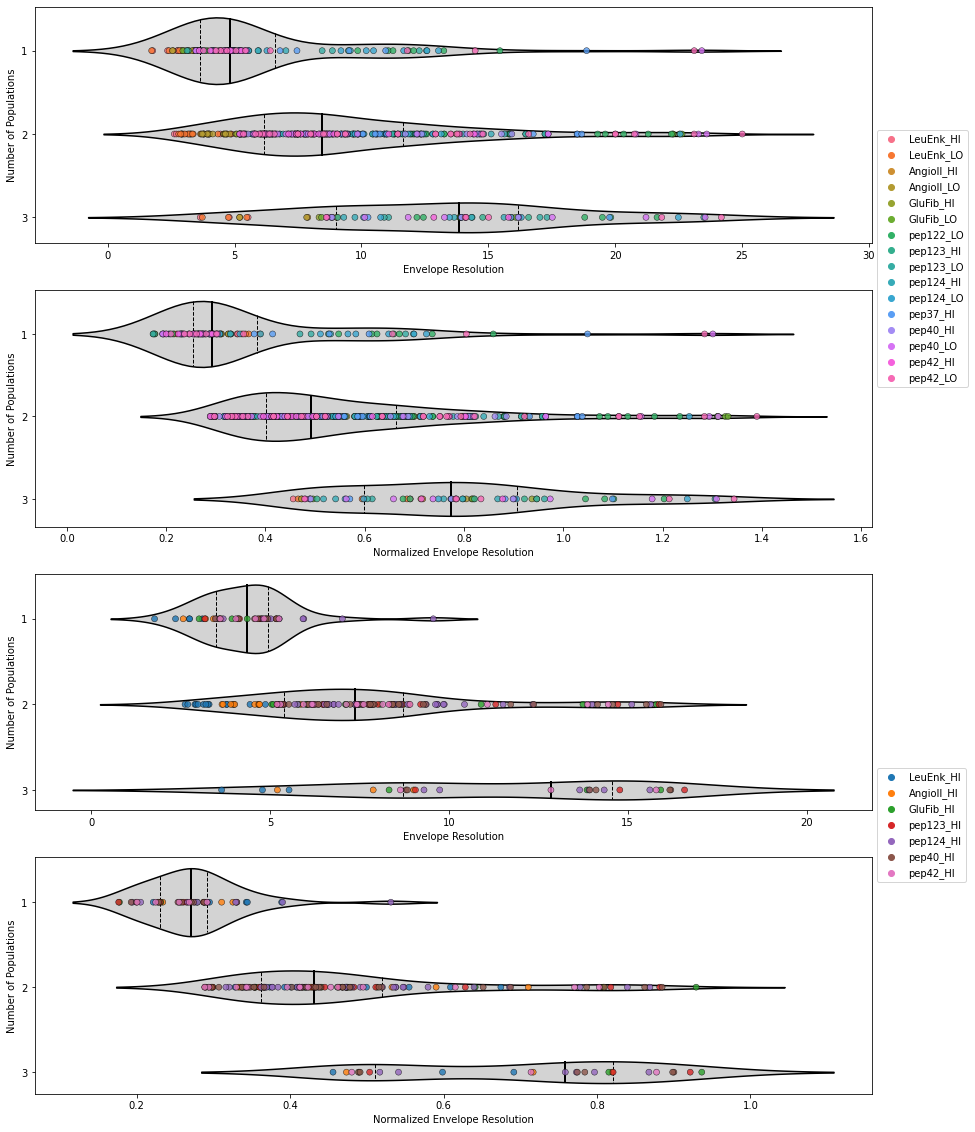

In [3]:
#this would clean up if plotted ~real~ envelopes instead of measured 

# env_res_1 = env_symmetry_adj *charge * (env[1]-env[0]) / ( 2.0 )
# env_symmetry_adj = 2.0 - (y.max() - env_Int)/y.max() # 0 -> assym, 1 -> symm  
                                                       # want 0 to be 2x and 1 to be 1x -> y = -1*x + 2

import seaborn as sns
import matplotlib.pyplot as plt

def patch_edges():
    from matplotlib.collections import PolyCollection
    
    for a in ax.flatten():
        for l in a.lines: #all
            l.set_color('black')
            l.set_linestyle('--')
            l.set_linewidth(1.0)
        for l in a.lines[1::3]: #center
            l.set_linestyle('-')
            l.set_linewidth(2.0)
        for art in a.get_children():
            if isinstance(art,PolyCollection):
                art.set_edgecolor((0.0,0.0,0.0))


all_data = hxex.data_fits.copy()
all_data = all_data[~all_data['sample'].str.contains('Brady')] #bradykinin data is rubbish
all_data['env_res_norm'] = all_data[['env_res_1','peptide']].apply(lambda x: x['env_res_1']/(len(x['peptide'])+3.0),axis=1)

hi_data = all_data.copy()[all_data['sample'].str.contains("HI")]
hi_data = hi_data[~hi_data['sample'].str.contains("pep37")]

fig, ax = plt.subplots(figsize=(15,20), ncols=1, nrows = 4,)# squeeze=False)

sns.violinplot(data=all_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[0],inner='quart',color='lightgrey')#color='white')
sns.scatterplot(data=all_data,x='env_res_1',y='solution_npops',hue='sample',ax=ax[0],legend=True,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[2],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_1',y='solution_npops',marker='o',hue='sample',ax=ax[2],zorder=10,edgecolor='black',alpha=0.8);


sns.violinplot(data=all_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[1],inner='quart',color='lightgrey')
sns.scatterplot(data=all_data,x='env_res_norm',y='solution_npops',hue='sample',ax=ax[1],legend=False,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[3],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_norm',y='solution_npops',marker='o',hue='sample',ax=ax[3],zorder=10,legend=False,edgecolor='black',alpha=0.8);

ax[0].legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax[2].legend(loc='upper left',bbox_to_anchor=(1,0.2));
for i in range(4):
    if i%2 == 0: ax[i].set_xlabel('Envelope Resolution')
    else: ax[i].set_xlabel('Normalized Envelope Resolution')
    ax[i].set_ylabel('Number of Populations')

patch_edges()


In [36]:
#way to generate a config_df after running deutdata_all, rawdata_all = hxex.get_data(metadf)

dropcols = ['Intensity','n_deut']
all_metadf = deutdata_all[deutdata_all.n_deut == 0]
all_metadf = all_metadf.drop(dropcols,axis=1)
all_metadf
# From here could add ['fit_npops'] column
# potential to add option to trim data, e.g. peaks picked outside have 0 intensity
filt_idx = hxex.filter_metadf(all_metadf,samples='B1B5',charge=2,timept=60,peptides='MTERRVPFSLL',quiet=True).index
all_metadf.loc[filt_idx,'lower_mz'] = 674
all_metadf.loc[filt_idx,'upper_mz'] = 680
all_metadf

,mz,time,rep,sample,charge,peptide,time_idx,lower_mz,upper_mz
0,674.873922,60.0,1.0,B1B5,2.0,MTERRVPFSLL,2,674.0,680.0
21,674.873922,60.0,2.0,B1B5,2.0,MTERRVPFSLL,2,674.0,680.0
41,674.873922,60.0,3.0,B1B5,2.0,MTERRVPFSLL,2,674.0,680.0
62,674.873922,72000.0,1.0,B1B5,2.0,MTERRVPFSLL,5,NaN,NaN
81,674.873922,72000.0,2.0,B1B5,2.0,MTERRVPFSLL,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14803,633.664555,0.0,1.0,HSPB1,3.0,SRQLSSGVSEIRHTADR,0,NaN,NaN
14827,633.664555,0.0,2.0,HSPB1,3.0,SRQLSSGVSEIRHTADR,0,NaN,NaN
14851,475.500235,0.0,1.0,HSPB1,4.0,SRQLSSGVSEIRHTADR,0,NaN,NaN
14876,475.500235,0.0,2.0,HSPB1,4.0,SRQLSSGVSEIRHTADR,0,NaN,NaN


In [4]:


# #Write / Read dataframe containing populations columns based on total results (easy way to have all datasets and timepts)

# hi_data['fit_npops'] = hi_data['solution_npops']
# saveto = os.path.join(config.Output_DIR,'testHI_data_fits.csv')
# hi_data.to_csv(saveto,index_label='Index')

# read_data_results = pd.read_csv(saveto).drop('Index',axis=1)

# #examples of manually changing the fit_npops values based on selection
# testidx = hxex.filter_metadf(hi_data,charge=2,timept=0,rep=1).index#['solution_npops'][0]
# testidx2 = hxex.filter_metadf(hi_data,charge=3,timept=0,rep=1).index#['solution_npops'][0]
# testdf = hi_data.copy()
# testdf['pop'] = np.nan
# testdf.loc[testidx,'pop'] = 2
# testdf.loc[testidx2,'pop']= 3
# testdf.loc[testidx | testidx2]

In [5]:
# #all_deut['solution_npops'] = hxex.solution['npops'][hxex.solution.time==timept].to_numpy()[0]
# all_deut, all_raw = hxex.get_data(metadf)
# all_deut['fit_npops'] = np.nan

# time_points = sorted(set(all_deut.time))
# n_time_points = len(time_points)

# for i in time_points:
#      filt_idx = hxex.filter_metadf(all_deut,timept=i,quiet=True).index
#      all_deut.loc[filt_idx,'fit_npops'] = hxex.solution['npops'][hxex.solution.time==i].to_numpy()[0]

# all_deut['solution_npops'] = all_deut['fit_npops']

# keep_cols = ['time','sample','peptide','charge','rep','peptide_range','fit_npops','solution_npops']
# test_config_df = all_deut.copy()[all_deut.n_deut==0][keep_cols]
# test_config_df.to_csv(os.path.join(config.Data_DIR,'test_config_df.csv'),index_label='Index')

In [8]:
data_fits = hxex.data_fits

In [12]:
#data_fits
# df['best_params'] = str_bestparams
# df['n1_params'] = str_n1params

hxex.rawdata_all

,mz,Intensity,time,sample,peptide,charge,rep,peptide_range,time_idx
0,555.412000,79.75,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,0
1,555.422000,46.00,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,0
2,555.432000,36.25,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,0
3,555.442000,61.25,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,0
4,555.453000,83.25,0.0,LeuEnk_HI,YGGFL,1,1,0001-0005,0
...,...,...,...,...,...,...,...,...,...
900,646.970700,0.00,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
901,646.981811,0.00,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
902,646.992923,0.00,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
903,647.004035,0.00,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23


In [7]:
config.Preset_Pops_File

'C:\\Users\\tuttl\\OneDrive\\Documents\\My Documents\\KlevitHahn\\hdx-ms\\pyHXExpress\\Bimodal_HDX_Data\\test_config_df.csv'

In [45]:
#hxex.deutdata
sample = 'pep42_LO'
peptide = 'RDKVQKEYALFYKLD'
charge = 3
rep = 1 
test = hxex.filter_metadf(hxex.deutdata_all,samples=sample,peptides=peptide,charge=charge)
display(test)
display(hxex.deutdata)

Dataframe filtered to 646 from 13998 total datasets


,mz,Intensity,n_deut,time,sample,peptide,charge,rep,peptide_range,time_idx
0,639.347392,6274.0,0,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
1,639.682801,5620.0,1,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
2,640.018210,3318.0,2,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
3,640.353619,1304.0,3,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
4,640.689028,410.0,4,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
...,...,...,...,...,...,...,...,...,...,...
641,646.390981,69.0,21,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
642,646.726390,0.0,22,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
643,647.061799,0.0,23,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
644,647.397208,0.0,24,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23


,mz,Intensity,n_deut,time,sample,peptide,charge,rep,peptide_range,time_idx
0,639.347392,6274.0,0,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
1,639.682801,5620.0,1,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
2,640.018210,3318.0,2,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
3,640.353619,1304.0,3,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
4,640.689028,410.0,4,0.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,0
...,...,...,...,...,...,...,...,...,...,...
641,646.390981,69.0,21,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
642,646.726390,0.0,22,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
643,647.061799,0.0,23,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23
644,647.397208,0.0,24,1000000.0,pep42_LO,RDKVQKEYALFYKLD,3,1,0001-0015,23


In [10]:
hxex.deutdata_all

,mz,Intensity,n_deut,time,sample,peptide,charge,rep,peptide_range,time_idx
0,810.507023,11378.0,0,0.0,pep123_LO,PLGVAPTKAKRRVVQ,2,1,0001-0015,0
1,811.010137,10722.0,1,0.0,pep123_LO,PLGVAPTKAKRRVVQ,2,1,0001-0015,0
2,811.513250,4136.0,2,0.0,pep123_LO,PLGVAPTKAKRRVVQ,2,1,0001-0015,0
3,812.016364,1682.0,3,0.0,pep123_LO,PLGVAPTKAKRRVVQ,2,1,0001-0015,0
4,812.519477,579.0,4,0.0,pep123_LO,PLGVAPTKAKRRVVQ,2,1,0001-0015,0
...,...,...,...,...,...,...,...,...,...,...
1248,548.052772,0.0,22,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23
1249,548.388181,0.0,23,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23
1250,548.723590,0.0,24,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23
1251,549.058999,0.0,25,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23


In [21]:
#pep123_LO 0001-0015 z2 low, 0s 815
#alldeut = hxex.deutdata
adf = hxex.filter_metadf(alldeut,samples='pep123_LO',charge=2,)#range=[1,15])

quite is false
Dataframe filtered to 0 from 632 total datasets


,mz,Intensity,n_deut,time,sample,peptide,charge,rep,peptide_range,time_idx
621,540.673774,34656.0,0,0.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,0
622,541.009183,31144.0,1,0.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,0
623,541.344592,13268.0,2,0.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,0
624,541.680001,3714.0,3,0.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,0
625,542.015410,1383.0,4,0.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,0
...,...,...,...,...,...,...,...,...,...,...
1248,548.052772,0.0,22,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23
1249,548.388181,0.0,23,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23
1250,548.723590,0.0,24,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23
1251,549.058999,0.0,25,1000000.0,pep123_LO,PLGVAPTKAKRRVVQ,3,1,0001-0015,23
